# Phase 1 Project

In [6]:
#imports
import pandas as pd
import numpy as np
import sqlite3
#imports
import matplotlib.pyplot as plt
# same as 
# from matplotlib import pyplot as plt

import seaborn as sns

from scipy import stats
from sklearn.datasets import load_iris
from matplotlib.ticker import StrMethodFormatter

# Import files

## Movie budgets

In [9]:
movie_budgets = pd.read_csv('data/tn.movie_budgets.csv.gz')


In [10]:
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [3]:
movie_budgets.shape

NameError: name 'movie_budgets' is not defined

## Merging SQL

In [11]:
#create connection
con = sqlite3.connect('data/im.db')

In [12]:
movie_ratings = pd.read_sql("""
SELECT *
FROM movie_ratings

""", con)

movie_ratings.head(15) 

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
5,tt1069246,6.2,326
6,tt1094666,7.0,1613
7,tt1130982,6.4,571
8,tt1156528,7.2,265
9,tt1161457,4.2,148


In [13]:
movie_basics = pd.read_sql("""
SELECT *
FROM movie_basics

""", con)

movie_basics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [14]:
movie_akas = pd.read_sql("""
SELECT movie_id, title
FROM movie_akas
WHERE region = 'US'
Group by movie_id
""", con)

movie_akas.shape

(47433, 2)

In [15]:
#3 data frames: movie_akas, movie_basics, movie_ratings.

In [16]:
akas_basics_merge = movie_akas.merge(movie_basics, on='movie_id',
                                        how='inner')

In [11]:
akas_basics_merge

,movie_id,title,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0069049,The Other Side of the Wind,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
1,tt0112502,Bigfoot,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller"
2,tt0159369,Cooper and Hemingway: The True Gen,Cooper and Hemingway: The True Gen,Cooper and Hemingway: The True Gen,2013,180.0,Documentary
3,tt0192528,Heaven & Hell,Heaven & Hell,Reverse Heaven,2018,104.0,Drama
4,tt0230212,The Final Journey,The Final Journey,The Final Journey,2010,120.0,Drama
...,...,...,...,...,...,...,...
47428,tt9837530,Monkey King Reloaded,Monkey King Reloaded,Monkey King Reloaded,2017,77.0,Adventure
47429,tt9845398,End of the Century,End of the Century,Fin de siglo,2019,84.0,Drama
47430,tt9875852,The House Elf,The House Elf,Domovoy,2019,90.0,"Comedy,Family,Fantasy"
47431,tt9882084,Chasing Happiness,Chasing Happiness,Chasing Happiness,2019,96.0,Documentary


In [17]:
imdb_merged = akas_basics_merge.merge(movie_ratings, on='movie_id',
                                       how='left')

In [19]:
imdb_merged

,movie_id,title,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0069049,The Other Side of the Wind,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
1,tt0112502,Bigfoot,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller",4.1,32.0
2,tt0159369,Cooper and Hemingway: The True Gen,Cooper and Hemingway: The True Gen,Cooper and Hemingway: The True Gen,2013,180.0,Documentary,7.6,53.0
3,tt0192528,Heaven & Hell,Heaven & Hell,Reverse Heaven,2018,104.0,Drama,4.0,72.0
4,tt0230212,The Final Journey,The Final Journey,The Final Journey,2010,120.0,Drama,8.8,8.0
...,...,...,...,...,...,...,...,...,...
47428,tt9837530,Monkey King Reloaded,Monkey King Reloaded,Monkey King Reloaded,2017,77.0,Adventure,NaN,NaN
47429,tt9845398,End of the Century,End of the Century,Fin de siglo,2019,84.0,Drama,7.2,21.0
47430,tt9875852,The House Elf,The House Elf,Domovoy,2019,90.0,"Comedy,Family,Fantasy",5.8,50.0
47431,tt9882084,Chasing Happiness,Chasing Happiness,Chasing Happiness,2019,96.0,Documentary,8.1,632.0


#  <font color='blue'>Creating Joined Data Table for All</font>

## Cleaning up data frames to properly join!
- Removing unnecessary columns: language, types, attributes
- Cleaning up date columns for proper joins
- Removing duplicates

<font color='blue'> Movie Budgets Table Cleanup </font>

In [20]:
#renaming movie title for ease of joining

movie_budgets.rename(columns = {'movie': 'title'}, inplace = True) 

In [21]:
movie_budgets.loc[movie_budgets['title'] == 'Aladdin'] 
#see here that there are 2 aladdins but they are from 2 seperate years
#this will be an issue for when we merge if we dont merge by year + title match

,id,release_date,title,production_budget,domestic_gross,worldwide_gross
80,81,"May 24, 2019",Aladdin,"$182,000,000","$246,734,314","$619,234,314"
2032,33,"Nov 11, 1992",Aladdin,"$28,000,000","$217,350,219","$504,050,219"


In [22]:
##need to merge on 2 columns i.e. start year and title column bc dupe movies diff years. 
#Can be a list to merge

In [23]:
#Creating new coumn called year that is date.time
movie_budgets['Release_Date_Time'] = pd.to_datetime(movie_budgets['release_date'])
movie_budgets['Year'] = movie_budgets['Release_Date_Time'].dt.year

In [24]:
movie_budgets['month'] = movie_budgets['Release_Date_Time'].dt.month

In [25]:
movie_budgets.info() #checking new column and type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   object        
 2   title              5782 non-null   object        
 3   production_budget  5782 non-null   object        
 4   domestic_gross     5782 non-null   object        
 5   worldwide_gross    5782 non-null   object        
 6   Release_Date_Time  5782 non-null   datetime64[ns]
 7   Year               5782 non-null   int64         
 8   month              5782 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 406.7+ KB


In [26]:
##taking sql_df_US, movie_budgets, movies and creating one table

movies = imdb_merged.merge(movie_budgets, left_on= ['primary_title', 'start_year'],right_on= ['title', 'Year'], how= 'inner')


In [27]:
movies.shape

(1340, 18)

In [28]:
movies

,movie_id,title_x,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,title_y,production_budget,domestic_gross,worldwide_gross,Release_Date_Time,Year,month
0,tt0249516,Foodfight!,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248.0,26,"Dec 31, 2012",Foodfight!,"$45,000,000",$0,"$73,706",2012-12-31,2012,12
1,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300.0,37,"Dec 25, 2013",The Secret Life of Walter Mitty,"$91,000,000","$58,236,838","$187,861,183",2013-12-25,2013,12
2,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116.0,67,"Sep 19, 2014",A Walk Among the Tombstones,"$28,000,000","$26,017,685","$62,108,587",2014-09-19,2014,9
3,tt0369610,Jurassic World 3D,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338.0,34,"Jun 12, 2015",Jurassic World,"$215,000,000","$652,270,625","$1,648,854,864",2015-06-12,2015,6
4,tt0376136,Hunter S. Thompson's The Rum Diary,The Rum Diary,The Rum Diary,2011,119.0,"Comedy,Drama",6.2,94787.0,16,"Oct 28, 2011",The Rum Diary,"$45,000,000","$13,109,815","$21,544,732",2011-10-28,2011,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,tt8155288,Happy Death Day 2U,Happy Death Day 2U,Happy Death Day 2U,2019,100.0,"Drama,Horror,Mystery",6.3,27462.0,78,"Feb 13, 2019",Happy Death Day 2U,"$9,000,000","$28,051,045","$64,179,495",2019-02-13,2019,2
1336,tt8266310,Blinded by the Light,Blinded by the Light,Blinded by the Light,2019,117.0,"Biography,Comedy,Drama",6.2,173.0,64,"Aug 14, 2019",Blinded by the Light,"$15,000,000",$0,$0,2019-08-14,2019,8
1337,tt8364368,Crawl,Crawl,Crawl,2019,NaN,"Action,Horror,Thriller",NaN,NaN,16,"Jul 12, 2019",Crawl,"$17,000,000",$0,$0,2019-07-12,2019,7
1338,tt8632862,Fahrenheit 11/9,Fahrenheit 11/9,Fahrenheit 11/9,2018,128.0,Documentary,6.7,11628.0,29,"Sep 21, 2018",Fahrenheit 11/9,"$5,000,000","$6,352,306","$6,653,715",2018-09-21,2018,9


In [23]:
movies['worldwide_gross'] = movies['worldwide_gross'].str.replace('$','').str.replace(',','').astype(float)
movies['production_budget'] = movies['production_budget'].str.replace('$','').str.replace(',','').astype(float)
movies['domestic_gross'] = movies['domestic_gross'].str.replace('$','').str.replace(',','').astype(float)

In [24]:
movies.drop('title_y', axis = 1, inplace = True)
movies.drop('Year', axis = 1, inplace = True)
movies.drop('release_date', axis = 1, inplace = True)
movies.drop('id', axis = 1, inplace = True)

In [25]:
#movies_profit['profit'].map("{:,.0f}".format)
movies['gross_formatted']= '$'+ movies['worldwide_gross'].map('{:,.0f}'.format)
movies

,movie_id,title_x,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,production_budget,domestic_gross,worldwide_gross,Release_Date_Time,month,gross_formatted
0,tt0249516,Foodfight!,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248.0,45000000.0,0.0,7.370600e+04,2012-12-31,12,"$73,706"
1,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300.0,91000000.0,58236838.0,1.878612e+08,2013-12-25,12,"$187,861,183"
2,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116.0,28000000.0,26017685.0,6.210859e+07,2014-09-19,9,"$62,108,587"
3,tt0369610,Jurassic World 3D,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338.0,215000000.0,652270625.0,1.648855e+09,2015-06-12,6,"$1,648,854,864"
4,tt0376136,Hunter S. Thompson's The Rum Diary,The Rum Diary,The Rum Diary,2011,119.0,"Comedy,Drama",6.2,94787.0,45000000.0,13109815.0,2.154473e+07,2011-10-28,10,"$21,544,732"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,tt8155288,Happy Death Day 2U,Happy Death Day 2U,Happy Death Day 2U,2019,100.0,"Drama,Horror,Mystery",6.3,27462.0,9000000.0,28051045.0,6.417950e+07,2019-02-13,2,"$64,179,495"
1336,tt8266310,Blinded by the Light,Blinded by the Light,Blinded by the Light,2019,117.0,"Biography,Comedy,Drama",6.2,173.0,15000000.0,0.0,0.000000e+00,2019-08-14,8,$0
1337,tt8364368,Crawl,Crawl,Crawl,2019,NaN,"Action,Horror,Thriller",NaN,NaN,17000000.0,0.0,0.000000e+00,2019-07-12,7,$0
1338,tt8632862,Fahrenheit 11/9,Fahrenheit 11/9,Fahrenheit 11/9,2018,128.0,Documentary,6.7,11628.0,5000000.0,6352306.0,6.653715e+06,2018-09-21,9,"$6,653,715"


#  <font color='blue'> 4. Plotting</font>

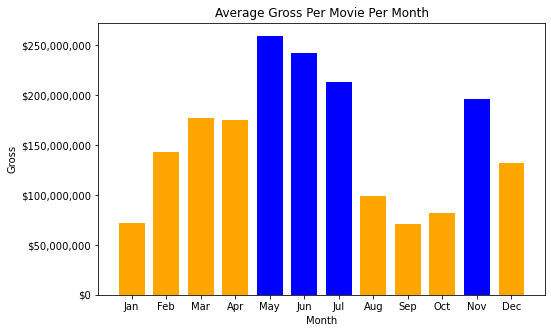

In [45]:

month_gross = movies.groupby(movies.month)['worldwide_gross'].mean()
y = month_gross.values.tolist()
x = month_gross.index.tolist()
# Now, let's plot two variables from the iris dataset
bar_chart_title = 'Average Gross Per Movie Per Month'
bar_chart_y_label = 'Gross'
bar_chart_x_label = 'Month'

fig, ax = plt.subplots(figsize=(8, 5))


ax.bar(x=x, height= y, width=0.75, 
       color= ('orange', 'orange', 'orange', 'orange', 'blue', 
               'blue', 'blue', 'orange', 'orange', 'orange','blue'), 
       tick_label=("Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul",
                 "Aug", "Sep", "Oct", "Nov", "Dec"))
       #stacked =True )
       

plt.title(bar_chart_title)
ax.set_xlabel(bar_chart_x_label)
ax.set_ylabel(bar_chart_y_label);
ax.ticklabel_format(axis = 'y', style= 'plain' )
ax.yaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))



### Key takeaways:
- Highest average gross is in the summer months (May - July) and November
- All ages of school are off in the summer which means more downtime and need to get out and do something (i.e. like seeing a movie)
- Presumably the reason for dip in August is due to most people going on vacation during the august month. Aditionally, in more western parts of the US school begins again as easy as august which would lead to a drop.
- November sees a high gross as well since this is when Award show season begins to close and often the movies loking to receive awards try to be released at the end of the season so that they are at the top of peoples minds
    - This also correlates with why January is such a low Worldwide Gross because the great movies do not want to   be released in the beginning of the year and then be forgotten abouts 


### Diving in a bit deeper
- Digging into analysis of average gross per movie per month per year in order to see if there can be takeaways from here as well

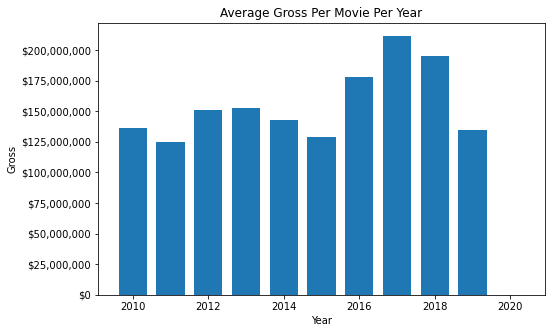

In [46]:
#graph below showing average gross per movie per year
year_gross = movies.groupby(movies.start_year)['worldwide_gross'].mean()

y = year_gross.values.tolist()
x = year_gross.index.tolist()
# Now, let's plotting the two variables 
bar_chart_title = 'Average Gross Per Movie Per Year'
bar_chart_y_label = 'Gross'
bar_chart_x_label = 'Year'

fig, ax = plt.subplots(figsize=(8, 5))

ax.bar(x=x, height= y, width=0.75)
       

plt.title(bar_chart_title)
ax.set_xlabel(bar_chart_x_label)
ax.set_ylabel(bar_chart_y_label);

#formatting the ticks
ax.ticklabel_format(axis = 'y', style= 'plain', )
ax.yaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))


In [28]:
#creating a new data table specifically for the analysis of looking at average gross per movie per month per year 

grouped_df = movies.groupby(['month','start_year']).agg({'worldwide_gross': 'mean'})
grouped_df


worldwide_gross
month start_year                 
1     2010           7.386000e+07
      2011           1.189247e+08
      2012           6.125140e+07
      2013           6.089032e+07
      2014           8.553710e+07
...                           ...
12    2015           7.391002e+07
      2016           1.888847e+08
      2017           1.820814e+08
      2018           1.790776e+08
      2019           0.000000e+00

[120 rows x 1 columns]

In [29]:
#resetting the index in order to create the month column and be able to create a unique agregate column
#in the next cell block 

grouped_df.reset_index(inplace = True) 

In [30]:
grouped_df['year_month'] = grouped_df['start_year'].astype(str) + "-" + grouped_df['month'].astype(str)

In [31]:
grouped_df #showing what is in dataset grouped d_f

,month,start_year,worldwide_gross,year_month
0,1,2010,7.386000e+07,2010-1
1,1,2011,1.189247e+08,2011-1
2,1,2012,6.125140e+07,2012-1
3,1,2013,6.089032e+07,2013-1
4,1,2014,8.553710e+07,2014-1
...,...,...,...,...
115,12,2015,7.391002e+07,2015-12
116,12,2016,1.888847e+08,2016-12
117,12,2017,1.820814e+08,2017-12
118,12,2018,1.790776e+08,2018-12


In [32]:
#creating indvidual variables in order to create line chart
y2010 = grouped_df.loc[grouped_df['start_year'] == 2010]
y2011 = grouped_df.loc[grouped_df['start_year'] == 2011]
y2012 = grouped_df.loc[grouped_df['start_year'] == 2012]
y2013 = grouped_df.loc[grouped_df['start_year'] == 2013]
y2014 = grouped_df.loc[grouped_df['start_year'] == 2014]
y2015 = grouped_df.loc[grouped_df['start_year'] == 2015]
y2016 = grouped_df.loc[grouped_df['start_year'] == 2016]
y2017 = grouped_df.loc[grouped_df['start_year'] == 2017]
y2018 = grouped_df.loc[grouped_df['start_year'] == 2018]
y2019 = grouped_df.loc[grouped_df['start_year'] == 2019]


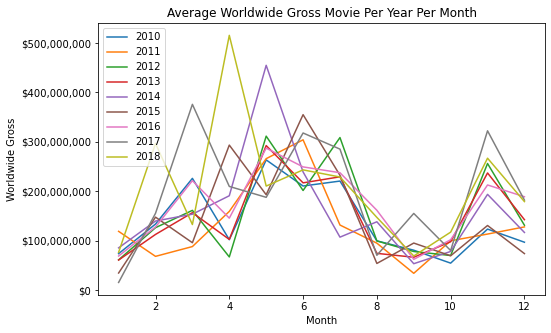

In [54]:
fig,ax = plt.subplots(figsize=(8, 5))
ax.plot(y2010['month'], y2010['worldwide_gross'])
ax.plot(y2011['month'], y2011['worldwide_gross'])
ax.plot(y2012['month'], y2012['worldwide_gross'])
ax.plot(y2013['month'], y2013['worldwide_gross'])
ax.plot(y2014['month'], y2014['worldwide_gross'])
ax.plot(y2015['month'], y2015['worldwide_gross'])
ax.plot(y2016['month'], y2016['worldwide_gross'])
ax.plot(y2017['month'], y2017['worldwide_gross'])
ax.plot(y2018['month'], y2018['worldwide_gross'])
#ax.plot(y2019['month'], y2019['worldwide_gross']) 

#formatting tick labels
ax.ticklabel_format(axis = 'y', style= 'plain' )
#plt.xticks(["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul",
                 #"Aug", "Sep", "Oct", "Nov", "Dec"])
plt.title("Average Worldwide Gross Movie Per Year Per Month")
ax.set_xlabel("Month")
ax.set_ylabel("Worldwide Gross");

ax.yaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))


#adding in index
ax.legend(["2010","2011","2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019"]);

Another way to visualize each individual year per month movie average:
- This way is very clunky and therefore deemed it not usable

In [34]:
x= grouped_df['year_month']

<BarContainer object of 120 artists>

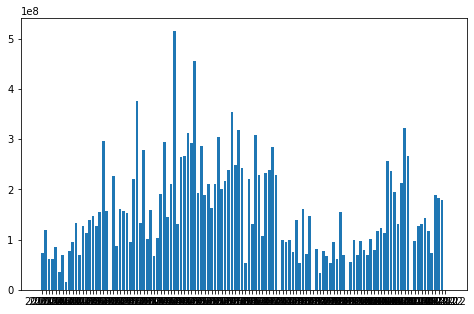

In [35]:
fig, ax = plt.subplots(figsize=(8, 5))

ax.bar(x= x, height = grouped_df['worldwide_gross'])